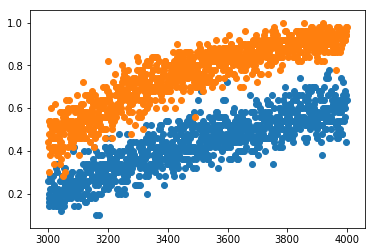

'done'

In [53]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import operator

# Initializing data
athletes = pd.read_csv('./athletes.csv')
athletes = athletes[athletes['dob'].notnull()]
birthdays = []

for i in athletes['dob']:
    arr = i.split("/")
    birthdays.append([arr[0], arr[1]])


def ifrandbirthday(samplesize): #This doesn't use data and assumes each birthday has equal likelihood of happening
    randombirthdays = []
    for i in range(samplesize):
        newBDay = random.randrange(365)
        randombirthdays.append(newBDay)
    if len(set(randombirthdays)) != samplesize:
        return True
    return False
    
def randbirthday(trialsize, samplesize): 
    counter = 0
    for i in range(trialsize):
        if ifrandbirthday(samplesize):
            counter += 1
    return counter/trialsize


     
def ifparadox(samplesize): # Classic Paradox
    rand_smpl = [ birthdays[i] for i in sorted(random.sample(range(len(birthdays)), samplesize)) ]
    s = set()
    for i in rand_smpl:
        s.add(str(i[0] + '/' + i[1]))
    if len(s) != samplesize:
        return True
    return False

def classicparadox(trialsize, samplesize):
    counter = 0
    for i in range(trialsize):
        if ifparadox(samplesize):
            counter += 1
    return counter/trialsize

def iffauxbirthdayproblem(samplesize): # Faux birthday problem, probability of sharing with you
    rand_smpl = [birthdays[i] for i in sorted(random.sample(range(len(birthdays)), samplesize))]
    birthday = str(rand_smpl[0][0] + '/' + rand_smpl[0][1])
    for i in rand_smpl[1:]:
        if str(i[0] + '/' + i[1]) == birthday:
            return True
    return False


def fauxbirthdayproblem(trialsize, samplesize):
    counter = 0
    for i in range(trialsize):
        if iffauxbirthdayproblem(samplesize):
            counter += 1
    return counter/trialsize

def ifrandfauxbirthday(samplesize): #This doesn't use data and assumes each birthday has equal likelihood of happening
    randombirthdays = []
    for i in range(samplesize):
        newBDay = random.randrange(365)
        randombirthdays.append(newBDay)
    for i in range(1, len(randombirthdays)):
        if randombirthdays[i] == randombirthdays[0]:
            return True
    return False

def fauxrandbirthday(trialsize, samplesize):
    counter = 0
    for i in range(trialsize):
        if ifrandfauxbirthday(samplesize):
            counter += 1
    return counter/trialsize


#Find the probability that atleast a given number of people have the same birthday
def ifbirthdayproblem(samplesize, number): # "number" refers to atleast that number of people having same birthday
    rand_smpl = [birthdays[i] for i in sorted(random.sample(range(len(birthdays)), samplesize))]
    d = {}
    for i in rand_smpl:
        if str(i[0] + '/' + i[1]) in d:
            d[str(i[0] + '/' + i[1])] += 1
        else:
            d[str(i[0] + '/' + i[1])] = 1
    if number in d.values():
        return True
    return False

def birthdayproblem2(trialsize, samplesize, number):
    counter = 0
    for i in range(trialsize):
        if ifbirthdayproblem(samplesize, number):
            counter += 1
    return counter/trialsize

def distinctbirthday(samplesize): #number of distinct birthdays given a number of people
    rand_smpl = [ birthdays[i] for i in sorted(random.sample(range(len(birthdays)), samplesize)) ]
    s = set()
    for i in rand_smpl:
        s.add(str(i[0] + '/' + i[1]))
    return len(s)


def ifstrongbirthday(samplesize): # No distinct birthday
    rand_smpl = [birthdays[i] for i in sorted(random.sample(range(len(birthdays)), samplesize))]
    d = {}
    for i in rand_smpl:
        if str(i[0] + '/' + i[1]) in d:
            d[str(i[0] + '/' + i[1])] += 1
        else:
            d[str(i[0] + '/' + i[1])] = 1
    if 1 in d.values():
        return False
    return True

# Works but doesn't match data i found on internet
def strongbirthday(trialsize, samplesize):
    counter = 0
    for i in range(trialsize):
        if ifstrongbirthday(samplesize):
            counter += 1
    return counter/trialsize

def ifrandstrongbirthday(samplesize):
    randombirthdays = []
    for i in range(samplesize):
        newBDay = random.randrange(365)
        randombirthdays.append(newBDay)
    d = {}
    for i in randombirthdays:
        if i in d:
            d[i] += 1
        else:
            d[i] = 1
    if 1 in d.values():
        return False
    return True

def randstrongbirthday(trialsize, samplesize):
    counter = 0
    for i in range(trialsize):
        if ifrandstrongbirthday(samplesize):
            counter += 1
    return counter/trialsize

def mostcommon(): # Most common birthdays in dataset
    d = {}
    for i in birthdays:
        if str(i[0] + '/' + i[1]) in d:
            d[str(i[0] + '/' + i[1])] += 1
        else:
            d[str(i[0] + '/' + i[1])] = 1
    print(d.values())
    print(sum(d.values()))
    sorted_d = sorted(d.items(), key=operator.itemgetter(1))
    sorted_d = sorted_d[::-1]
    x, y = zip(*sorted_d) # unpack a list of pairs into two tuples
    print(x)
    print(y)
    plt.bar(x[:10], y[:10])
    plt.show() # For some reason it's not showing in right order
    
# modify this function to print the above functions
def plot():
    x = []
    y = []
    for i in range(3000, 4000):
        x.append(i)
        y.append(strongbirthday(50, i))
    x2 = []
    y2 = []
    for i in range(3000, 4000):
        x2.append(i)
        y2.append(randstrongbirthday(50, i))

    plt.figure(1)
    plt.scatter(x, y)
    plt.scatter(x2, y2)
    plt.show()
    
    return "done"

plot()